In [2]:
import pandas as pd

In [3]:
solar_data = pd.read_csv('solarpower.csv')
solar_data.head()

,date,cum_power
0,2017-01-01,20111.0
1,2017-01-02,20112.0
2,2017-01-03,20115.0
3,2017-01-04,20117.0
4,2017-01-05,20119.0


In [9]:
for i in range(1,len(solar_data['cum_power'])-1):
    if solar_data['cum_power'].loc[i]==-1:
       solar_data['cum_power'].loc[i]=(solar_data['cum_power'].loc[i-1]+solar_data['cum_power'].loc[i+1])/2

C:\Users\USER\AppData\Local\Temp\ipykernel_7532\4036023892.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solar_data['cum_power'].loc[i]=(solar_data['cum_power'].loc[i-1]+solar_data['cum_power'].loc[i+1])/2
C:\Users\USER\AppData\Local\Temp\ipykernel_7532\4036023892.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solar_data['cum_power'].loc[i]=(solar_data['cum_power'].loc[i-1]+solar_data['cum_power'].loc[i+1])/2


In [10]:
round(solar_data['cum_power'].mean(),0)

23848.0

In [13]:
solar_data['date'] = pd.to_datetime(solar_data['date'], errors='coerce')

In [22]:
solar_data['month']=solar_data['date'].dt.to_period('M')

In [32]:
solar_data['day_power']=solar_data['cum_power'].diff()

In [33]:
solar_data

,date,cum_power,month,year,day_power
0,2017-01-01,20111.0,2017-01,2017,NaN
1,2017-01-02,20112.0,2017-01,2017,1.0
2,2017-01-03,20115.0,2017-01,2017,3.0
3,2017-01-04,20117.0,2017-01,2017,2.0
4,2017-01-05,20119.0,2017-01,2017,2.0
...,...,...,...,...,...
659,2018-10-22,28101.0,2018-10,2018,6.0
660,2018-10-23,28109.0,2018-10,2018,8.0
661,2018-10-24,28115.0,2018-10,2018,6.0
662,2018-10-25,28117.0,2018-10,2018,2.0


In [37]:
df=solar_data.groupby('month',as_index=False)['day_power'].mean()

In [35]:
import matplotlib.pyplot as plt

In [36]:
plt.figure(figsize=(12, 10))

<Figure size 1200x1000 with 0 Axes>

<Figure size 1200x1000 with 0 Axes>

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype    
---  ------     --------------  -----    
 0   month      22 non-null     period[M]
 1   day_power  22 non-null     float64  
dtypes: float64(1), period[M](1)
memory usage: 480.0 bytes


In [42]:
df["month"] = df["month"].astype("datetime64")

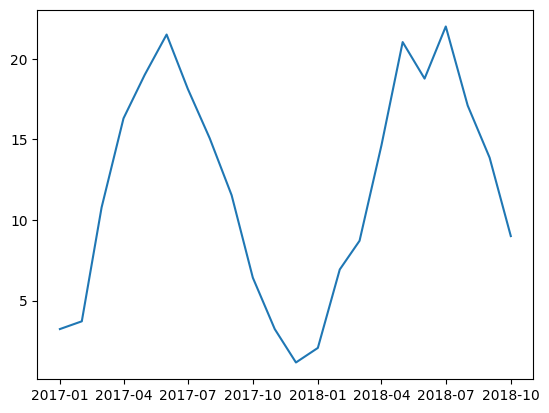

In [43]:
plt.plot(df['month'],df['day_power'])

In [44]:
one = [1, "2", 3, "4"]
two = ("a", "b", "c", "d")

In [45]:
one.append(5)

In [46]:
two.append("f")

AttributeError: 'tuple' object has no attribute 'append'

In [47]:
one.extend(two)

In [48]:
two.extend(one)

AttributeError: 'tuple' object has no attribute 'extend'

In [49]:
three = two + ("f", 'g')

In [50]:
three = one + two

TypeError: can only concatenate list (not "tuple") to list

In [67]:
products = {'Oranges (packaged)': 114.99, 'Candy (Rotfront)': 280.0, 'Boiled sausage': 199.99, 'Juice J7 (orange)': 119.99, 'Trout (Seven Seas)': 399.99}
stocks = {'Boiled sausage': '33%', 'Juice J7 (orange)': '12%', 'Trout (Seven Seas)': '18%'}





In [68]:
def apply_discounts(products, stocks):
    for i in stocks.keys():
        value = stocks[i]
        value = float(value[:-1])
        stocks[i] = value * 0.01
 
    fruit2 = products.copy()
    for i in fruit2.keys():
        if i in stocks:
           fruit2[i] *= 1.0 - stocks[i]
        fruit2[i] = round(fruit2[i], 2)
    return fruit2    

In [69]:
f=apply_discounts(products, stocks)

In [70]:
f


{'Oranges (packaged)': 114.99,
 'Candy (Rotfront)': 280.0,
 'Boiled sausage': 133.99,
 'Juice J7 (orange)': 105.59,
 'Trout (Seven Seas)': 327.99}

In [ ]:
import pandas as pd
bronze=pd.read_csv('bronze_top.csv')
silver=pd.read_csv('silver_top.csv')

merged=bronze.merge(silver, how='inner', on='Country', suffixes=('_bronze', '_silver'))